# DAT200 CA3 2023

Kaggle username: jakobbernstein

### Imports

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Reading data

In [167]:
# Load water dataset
training_data = pd.read_csv("./assets/train.csv", index_col=0)
test_data = pd.read_csv("./assets/test.csv", index_col=0)

training_data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
0,8.699665,206.379671,20051.663488,7.725750,360.083725,408.388221,14.859047,76.846364,5.710412,0
1,6.563410,175.697020,16117.048403,6.084136,333.778060,412.632708,11.222295,73.502793,4.459252,1
2,6.817023,246.660238,19537.573853,9.051732,317.237871,464.209418,14.822665,68.918597,4.602564,0
3,7.449572,146.902210,19924.425670,7.950549,444.198272,554.679850,19.483985,72.081011,3.809883,0
4,5.300541,212.435573,12624.741570,7.313756,350.452182,356.512171,19.213205,99.351837,3.841719,1
5,6.956687,218.825756,23448.018319,7.054301,307.641101,331.847552,9.023040,48.127138,3.782870,1
6,9.530134,226.708359,14861.325547,5.271028,350.174163,327.386894,11.315137,72.570323,3.608835,0
7,3.988311,199.099454,19456.287932,7.232670,415.912592,383.536614,16.029647,91.014746,5.075183,0
8,7.228313,183.213812,24140.271278,5.657258,269.612819,410.599068,12.156530,77.048602,4.396091,1
9,7.417612,170.809921,16185.839099,6.059446,330.667935,560.557519,11.487874,77.512744,3.957272,1


### Data exploration and visualisation



                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2040.000000  2040.000000   2040.000000  2040.000000  2040.000000   
mean      7.045930   195.998874  22005.555875     7.111529   333.349677   
std       1.597071    34.284142   8683.483885     1.616997    45.805572   
min       0.216124    69.817622    336.989742     1.321327   171.196409   
25%       6.033722   174.968973  15566.304215     6.111137   304.722266   
50%       6.958491   197.260049  20977.941519     7.098779   335.207355   
75%       7.998105   216.784623  26971.346790     8.078323   360.990547   
max      14.700000   301.471218  58101.437939    13.286030   483.112422   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   2040.000000     2040.000000      2040.000000  2040.000000  
mean     424.783924       14.240333        66.311518     3.964849  
std       83.757539        3.455875        16.485962     0.792210  
min      191.538750        2.090000         8.148162

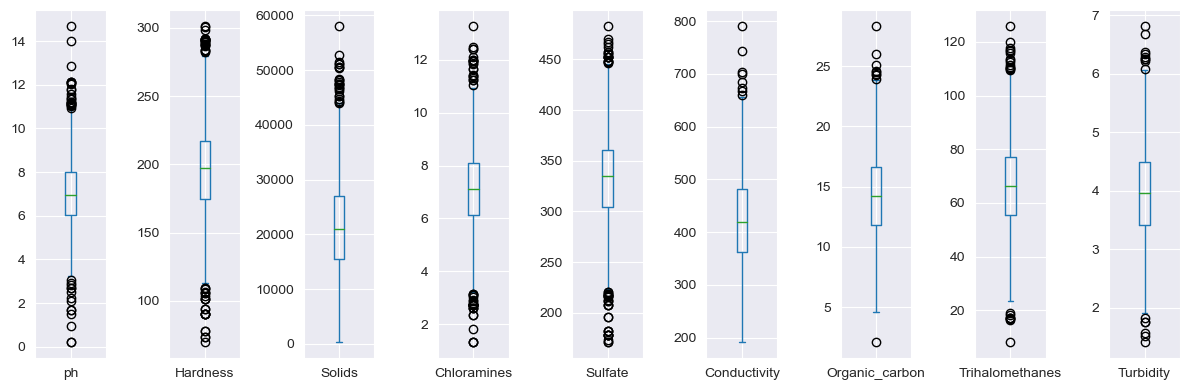


Missing (NaN) values in each of the columns in the dataset:

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Drinkable          0
dtype: int64


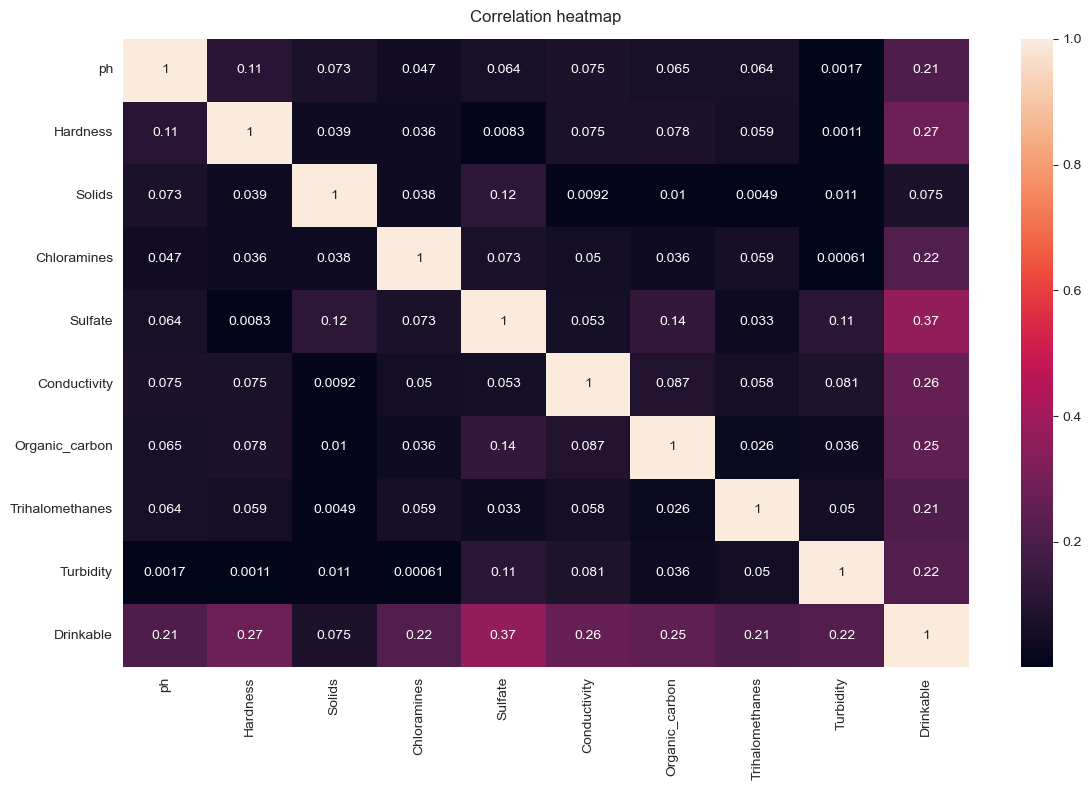

In [168]:
# Generate descriptive statistics
print(training_data.drop(['Drinkable'], axis=1).describe())

# Boxplot to visualize possible outliers
training_data.drop(['Drinkable'], axis=1).plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(12, 4)
)
plt.tight_layout()
plt.show()

# Check for missing (NaN) values
print("\nMissing (NaN) values in each of the columns in the dataset:\n")
print(training_data.isnull().sum())

# Correlation matrix to see if any features are highly correlated
cor_matrix = training_data.corr().abs()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(cor_matrix, annot=True)
heatmap.set_title('Correlation heatmap', fontdict={'fontsize': 12}, pad=12);
plt.tight_layout()
plt.show()

### Data cleaning

We can see from the box plot that there are some outliers in each of the features. To improve the accuracy of the model, we will identify the outliers in the dataset using a threshold value of 3 for the Z-score. Any row containing a data point that has a Z-score greater than the threshold value is considered an outlier and will be removed.

We can interpret the correlation matrix, and see that there are no features that are significantly correlated. Based on this, we choose not to remove any features.

There are no NaN values in the dataset, so there is no need to remove any rows because of this.

In [176]:
# Remove outliers using Z-score method

z = np.abs(stats.zscore(training_data))
threshold = 3
training_data = training_data[(z < threshold).all(axis=1)]

### Data exploration after cleaning

We can see that there have been removed some rows in the dataset after removing the outliers using the Z-score method. The box plot now indicates that some of the outliers are removed.

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  1955.000000  1955.000000   1955.000000  1955.000000  1955.000000   
mean      7.043730   196.206868  21716.910554     7.082512   334.645224   
std       1.486325    33.233974   8381.176150     1.553625    43.793835   
min       2.495606    93.833061    336.989742     2.360161   208.191488   
25%       6.059456   175.048970  15519.674361     6.108543   305.470533   
50%       6.961493   196.993811  20827.779809     7.079624   335.469700   
75%       7.967632   216.122828  26719.646969     8.053060   361.286283   
max      11.797197   298.090657  47786.113535    11.864360   469.788860   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   1955.000000     1955.000000      1955.000000  1955.000000  
mean     424.337131       14.266866        66.153054     3.965433  
std       83.108072        3.426037        16.178511     0.777842  
min      191.538750        4.590494        17.114509

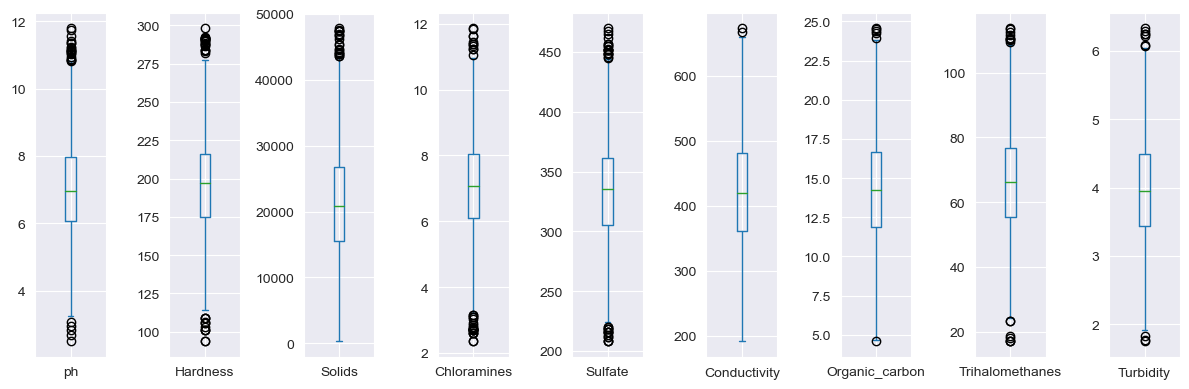

In [170]:
# Generate descriptive statistics
print(training_data.drop(['Drinkable'], axis=1).describe())

# Boxplot to visualize possible outliers
training_data.drop(['Drinkable'], axis=1).plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(12, 4)
)
plt.tight_layout()
plt.show()

### Data preprocessing

Splitting the training data into X (features) and y (target)

In [171]:
X = training_data.drop(["Drinkable"], axis=1).values
y = training_data["Drinkable"].values
X_final = test_data.values  # test data set

#### Modelling using different train_test_splits and number of estimators for the random forest classifier

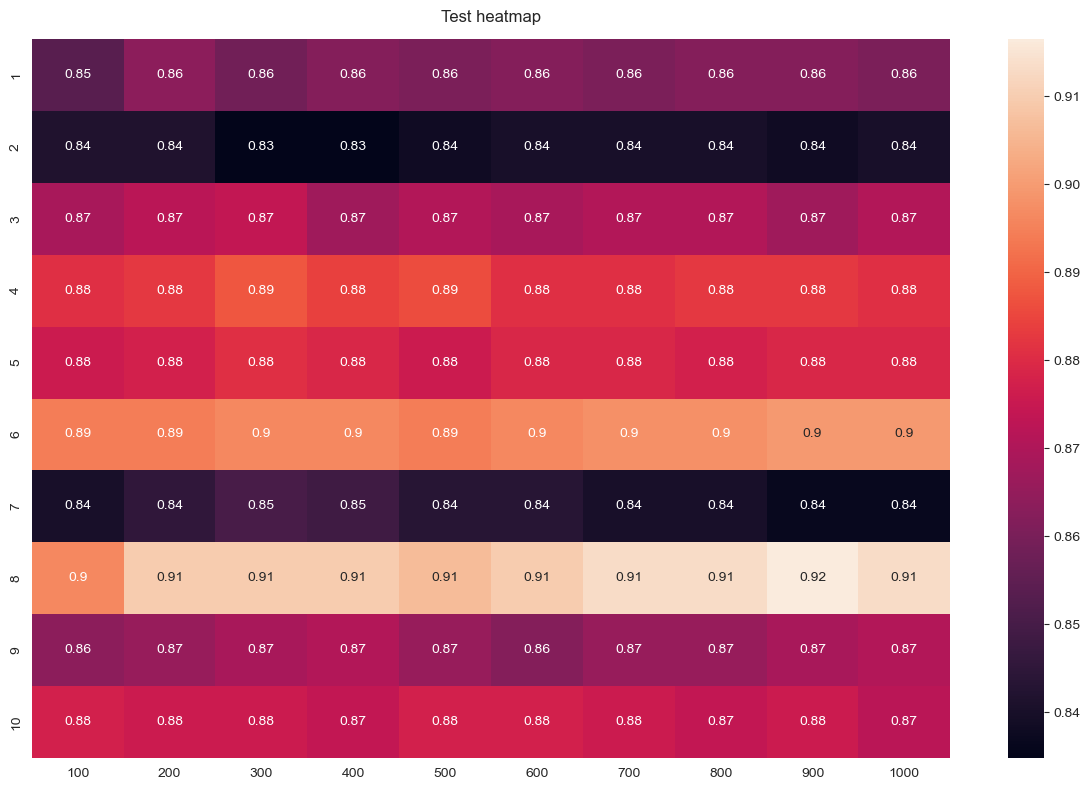

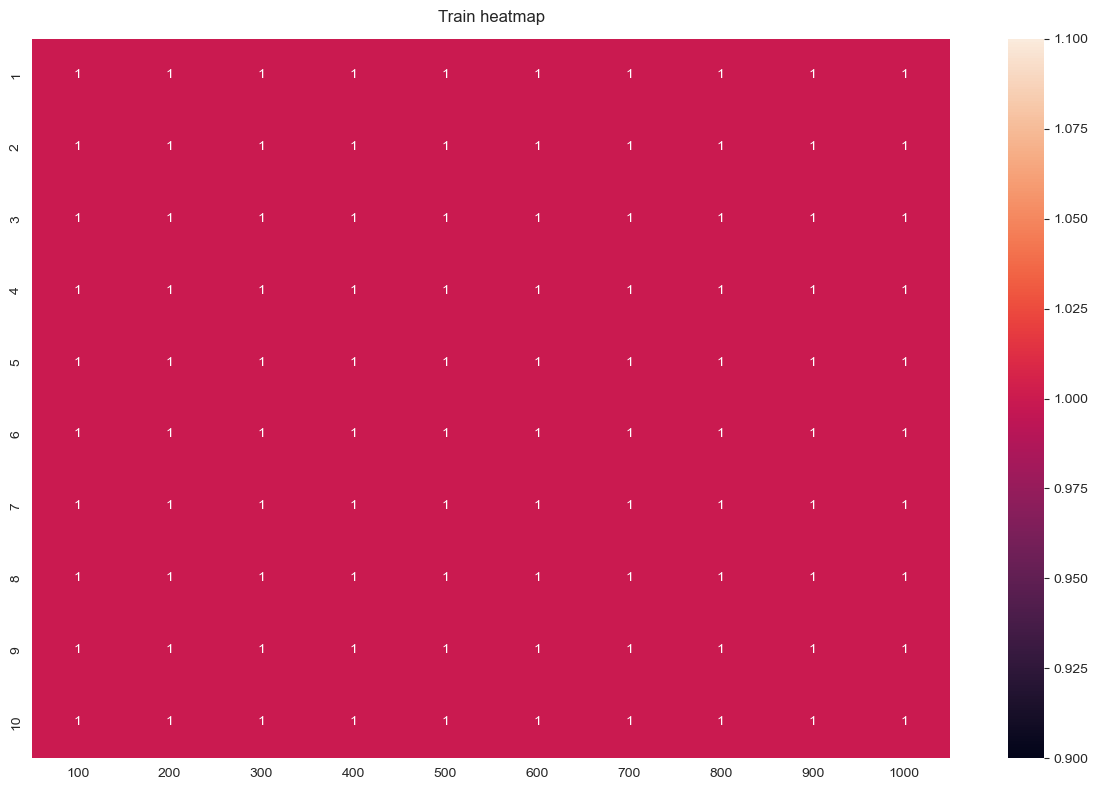

In [172]:
num_rs = 10  # number of random states to iterate through
n_est_min = 100  # minimum number of estimators for the random forest classifier
n_est_max = 1000  # maximum number of estimators for the random forest classifier
n_estimators_step = 100

rs_list = range(1, num_rs + 1)
n_estimators_list = range(n_est_min, n_est_max + 1, n_estimators_step)

# Arrays to store classification accuracy for each random state and number of estimators
forest_heatmap_train = np.zeros((num_rs, len(n_estimators_list)))
forest_heatmap_test = np.zeros((num_rs, len(n_estimators_list)))

# Train random forest classifier using different train_test_splits and number of estimators

for n, rs in enumerate(rs_list):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=rs, stratify=y)

    for m, n_estimators in enumerate(n_estimators_list):
        forest = RandomForestClassifier(criterion='gini',
                                        n_estimators=n_estimators,
                                        random_state=1,
                                        n_jobs=-1)

        # Training the models
        forest.fit(X_train, y_train)

        # Appending the test accuracy to the heatmap matrices
        forest_heatmap_test[n, m] = forest.score(X_test, y_test)
        forest_heatmap_train[n, m] = forest.score(X_train, y_train)

# Heatmap plotting
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(forest_heatmap_test, annot=True, yticklabels=rs_list, xticklabels=n_estimators_list)
heatmap.set_title('Test heatmap', fontdict={'fontsize': 12}, pad=12);
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(forest_heatmap_train, annot=True, yticklabels=rs_list, xticklabels=n_estimators_list)
heatmap.set_title('Train heatmap', fontdict={'fontsize': 12}, pad=12);
plt.tight_layout()
plt.show()


### Final Evaluation

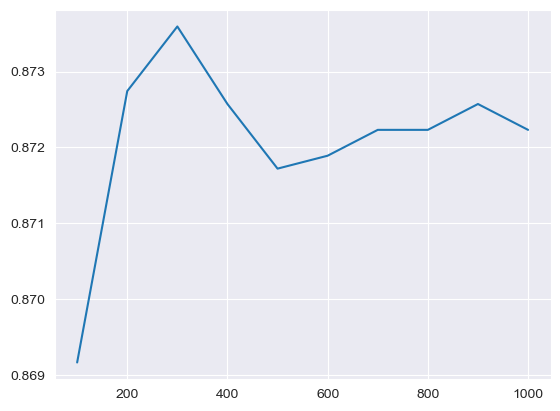


The maximum test set classification accuracy with the random forest classifier is 87.36 %
This was achieved using 300 estimators


In [173]:
acc_df = pd.DataFrame(data=forest_heatmap_test, index=rs_list, columns=n_estimators_list)
ax = acc_df.mean(axis=0).plot()
plt.show()
acc_df.head()
best_n_estimators = n_estimators_list[acc_df.mean(axis=0).argmax()]

print(
    f"\nThe maximum test set classification accuracy with the random forest classifier is {np.round(acc_df.mean(axis=0).max(), 4) * 100} %")
print(f"This was achieved using {best_n_estimators} estimators")

### Kaggle submission

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=best_n_estimators,
                                random_state=1,
                                n_jobs=-1)
forest.fit(X_train, y_train)

y_pred = pd.DataFrame(forest.predict(X_final)).reset_index()
y_pred.columns = ["index", "Drinkable"]
y_pred.to_csv(f"submission1.csv", index=False)